# <b>hist</b>

<style>
    .warn2 { color: red; }
</style>

This section describes various options available for histogram plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/hist.html#hist

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt
import imageio.v3 as imageio

Read some fake data to generate plots:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')
df.head()

,Batch,Sample,Region,Value,ID
0,101,1,Alpha123,3.5,ID701223A
1,101,1,Alpha123,0.0,ID7700-1222B
2,101,1,Alpha123,3.3,ID701223A
3,101,1,Alpha123,3.2,ID7700-1222B
4,101,1,Alpha123,4.0,ID701223A


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Input data format

`fcp.hist` supports input data of two formats:

1. tabular data found in a `pd.DataFrame` (with or without grouping columns)

2. image data, either as a single `np.array` or a `dict` of `np.array`s with a `pd.DataFrame` consisting of grouping information (see <a href="imshow.html#image-data-format">imshow documentation</a> for a more detailed explanation of this format)

## Simple histogram

### Vertical bars

We calculate a simple histogram with default bin size of 20:

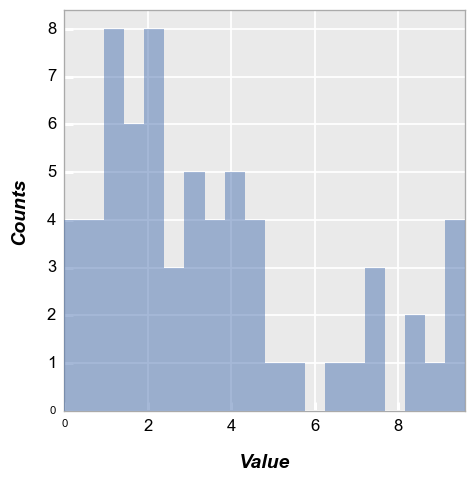

In [4]:
fcp.hist(df, x='Value')

..note:: "Counts" are automatically calculated based on the data in the "x" column

### Horizontal bars

Same data as above but with histogram bars oriented horizontally:

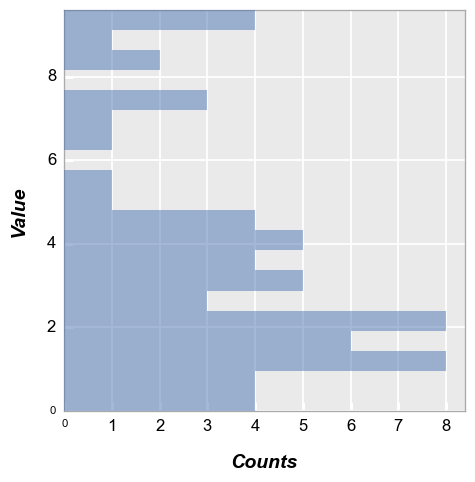

In [5]:
fcp.hist(df, x='Value', horizontal=True)

### Bin counts

We can change the number of bins used via the keyword `hist_bins` or `bins`:

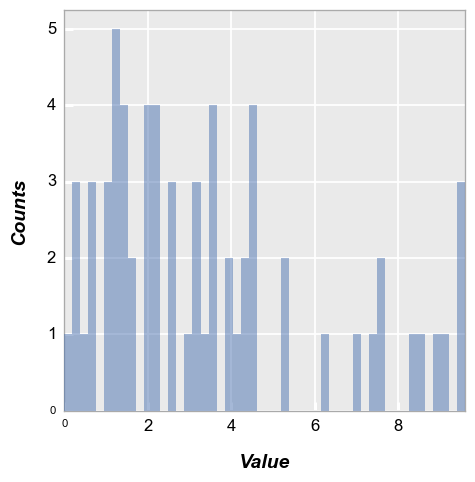

In [6]:
fcp.hist(df, x='Value', bins=50)

## Grouping

### Legend

Add a legend:

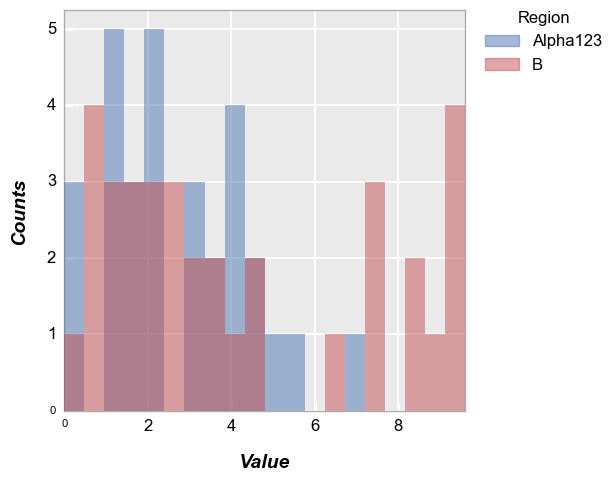

In [7]:
fcp.hist(df, x='Value', legend='Region')

### Row/column plot

Make multiple subplots with different row/column values:

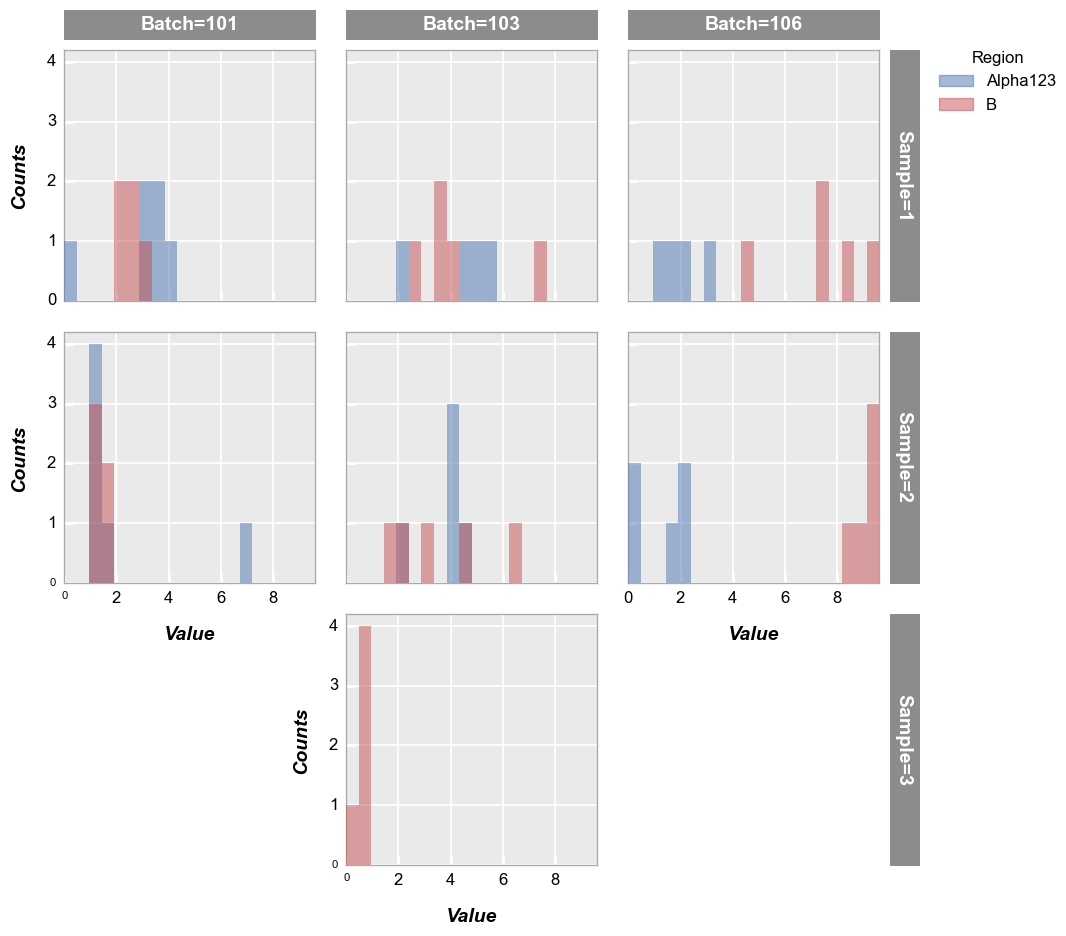

In [8]:
fcp.hist(df, x='Value', legend='Region', col='Batch', row='Sample', ax_size=[250, 250])

### Wrap plot

First we wrap the data using a column from the `DataFrame`:

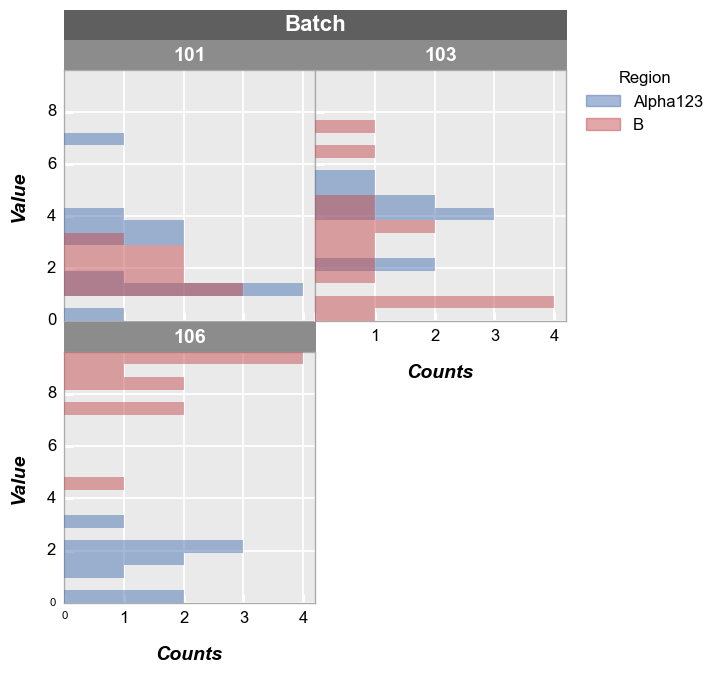

In [ ]:
fcp.hist(df, x='Value', legend='Region', wrap='Batch', ax_size=[250, 250], horizontal=True)

Next we wrap by `x` which means we make a subplot for each x-column name provided.  To illustrate this, we create a couple of new columns in the `DataFrame` that are just multiples of the "Value" column:

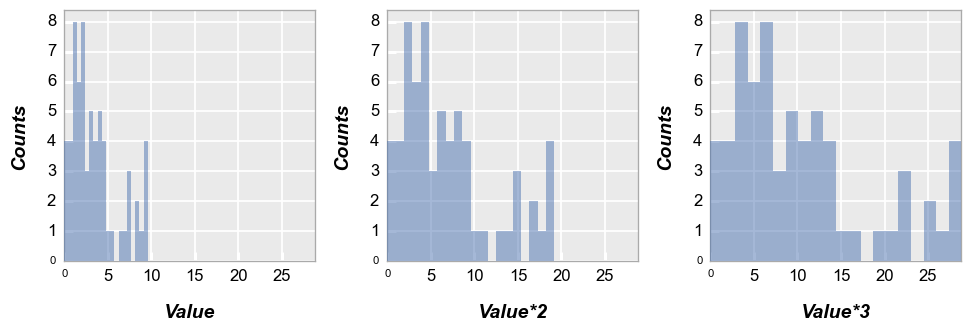

In [10]:
df['Value*2'] = 2*df['Value']
df['Value*3'] = 3*df['Value']
fcp.hist(df, x=['Value', 'Value*2', 'Value*3'], wrap='x', ncol=3, ax_size=[250, 250])

## Kernel density estimator

We can overlay a kernel density estimation curve on the histogram using keyword `kde=True`.  These curves can be styled using standard line `Element` parameters prefixed by `kde_`:

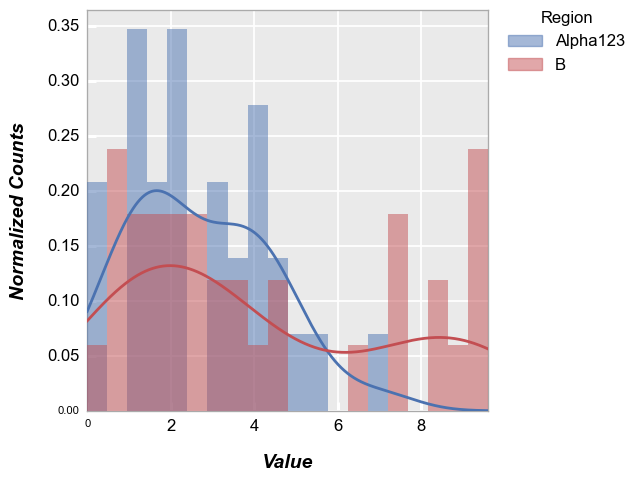

In [11]:
fcp.hist(df, x='Value', legend='Region', kde=True, kde_width=2)

## Other options

A couple of other options are available to present histogram data.  Starting with our basic example from section 2:

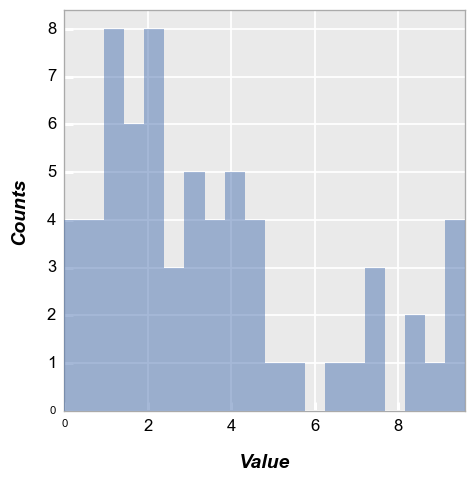

In [12]:
fcp.hist(df, x='Value')

### Cumulative

Now we enable "cumulative" mode so that each subsequent bin contains the total number of counts from the previous bins:

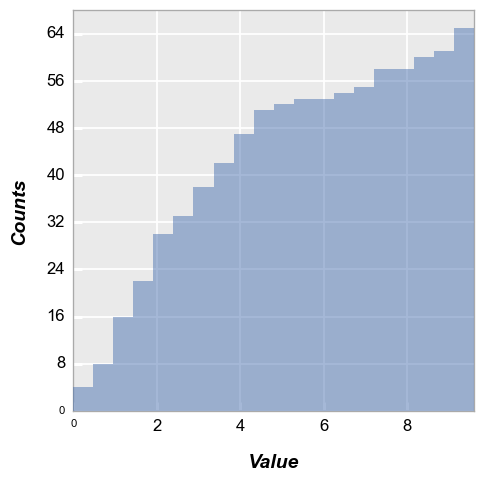

In [ ]:
fcp.hist(df, x='Value', cumulative=True)  # or hist_cumulative to be more specific

### Normalize

Histogram normalization divides each bin's raw count the total number of counts and sets the bin width so that the area under the histogram integrates to 1.

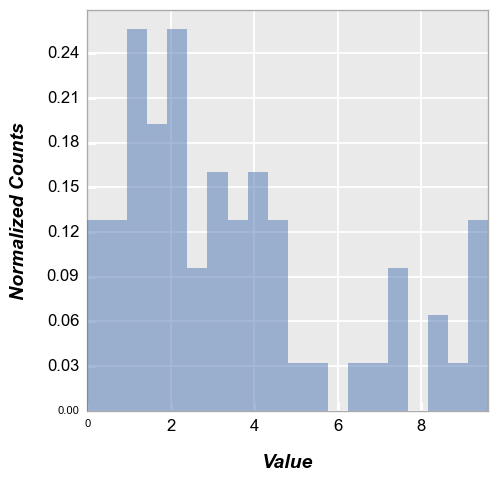

In [14]:
fcp.hist(df, x='Value', normalize=True)  # or hist_normalize to be more specific

## Images

`fcp.hist` is a powerful tool for data analysis of RAW and color images in image sensor / camera engineering activities.  By default, image histograms are automatically converted to line plots with a histogram bin for each digital code from `0` to `2**bit_depth - 1`.  Additional options are also provided to split RAW images by color-filter array (CFA) pattern and color images by channel.  

..warning:: For images with high bit-depth and thus a very high number of bins, user of `np.histogram` can be slow.  However, if the image data is of integer data type, <b>fivecentplots</b> will use `np.bincount` which is insanely faster.  Therefore, we recommend using integer-type image data wherever possible

### RAW
First, consider a simple example of a 300x300 gray patch with all pixel values near the mid-level of a 16-bit camera with no color-filter array.

In [15]:
h, w = 300, 300
img = (np.ones([h, w]) * (2**10 - 1) / 2).astype(np.uint16)
img

array([[511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       ...,
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511]], dtype=uint16)

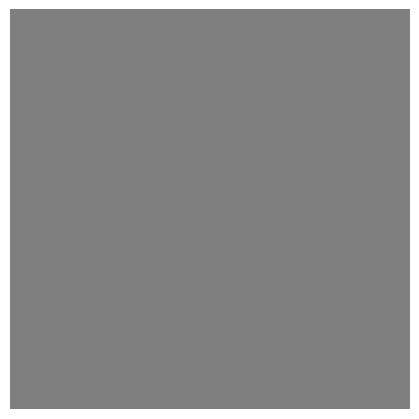

In [16]:
fcp.imshow(img, cmap='gray', zmin=0, zmax=2**10)

In this case, our histogram is a single point with 300 * 300 counts:

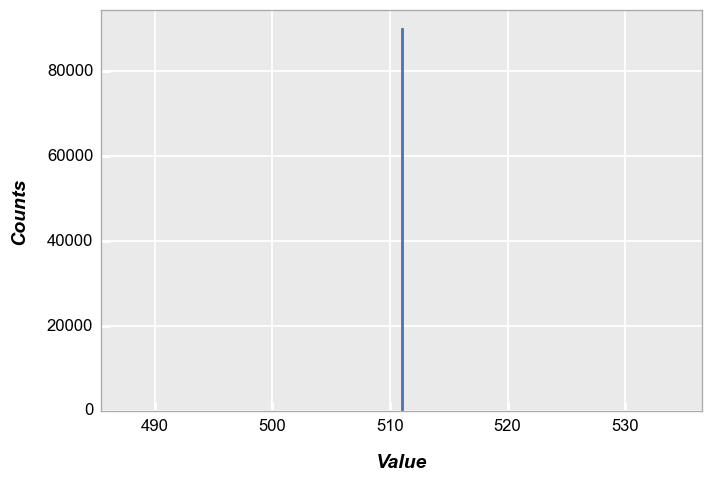

In [17]:
fcp.hist(img, markers=False, ax_size=[600, 400], line_width=2)

Now let's multiplying our patch by a 2D Gaussian to approximate lens shading:

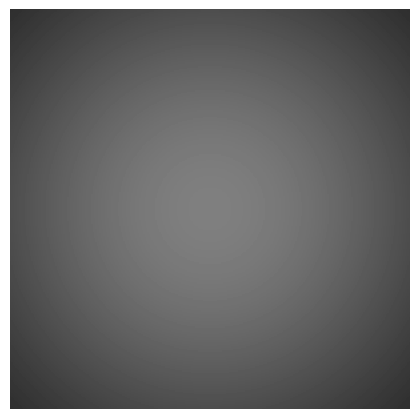

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
dst = np.sqrt(x*x+y*y)
sigma = 1
muu = 0.001

gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2 )))
img2 = (gauss * img).astype(np.uint16)
fcp.imshow(img2, cmap='gray', zmin=0, zmax=2**10)

The resulting histogram is shown below:

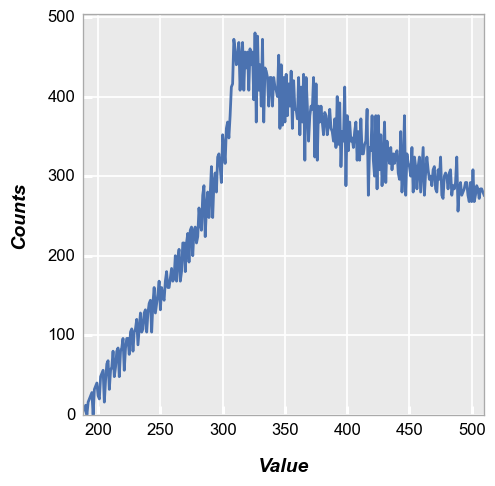

In [19]:
fcp.hist(img2, markers=False, line_width=2)

### Bayer

Now lets mock-up a Bayer array for a light blue color patch and demonstrate how <b>fivecentplots</b> allows you to easily split the histogram into distinct color planes (based on a CFA pattern).  Here we'll assume "GRBG" CFA:

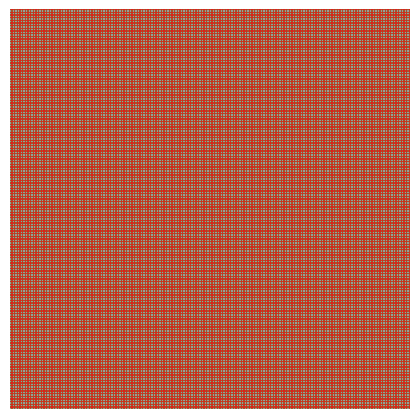

In [20]:
img_rgb = np.zeros([300, 300]).astype(np.uint16)
img_rgb[::2, ::2] = 180  # green_red
img_rgb[1::2, 1::2] = 180  # green_blue
img_rgb[::2, 1::2] = 10
img_rgb[1::2, ::2] = 255
fcp.imshow(img_rgb, cmap='Set1')

Which after basic demosaicing (no edge treatment) would give :

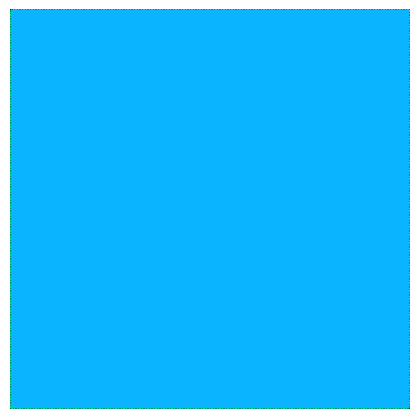

In [21]:
import colour_demosaicing
fcp.imshow(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(np.array(img_rgb), 'GRBG').astype(np.uint8))

By default, the `fcp.hist` does not distinguish between pixel CFA type, so we end up with three distinct histogram peaks:

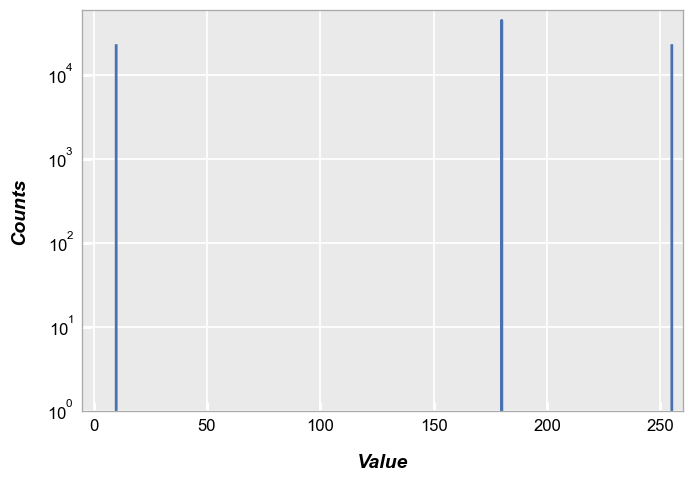

In [22]:
fcp.hist(img_rgb, markers=False, ax_scale='logy', ax_size=[600, 400], line_width=2, xmin=-5, xmax=260, ymin=1, ymax=60000)

However, if we specify the CFA via the keyword `cfa`, a new column in the grouping data named "Plane" is created.  We can then legend by this color plane.  Notice in this example that the "gr" and "gb" pixels overlap.

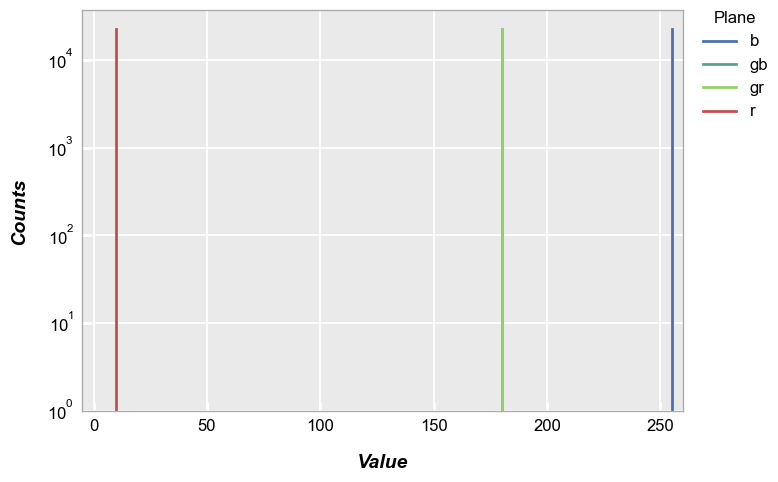

In [ ]:
fcp.hist(img_rgb, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, xmin=-5, xmax=260,
         colors=fcp.RGGB)

..note:: For better visualization above, we also invoke a special color scheme shortcut `fcp.RGGB` to color the histograms for each plane according to their filter color

Now lets add some shading and noise to make a more meaningful histogram.  This results in the color patch below.

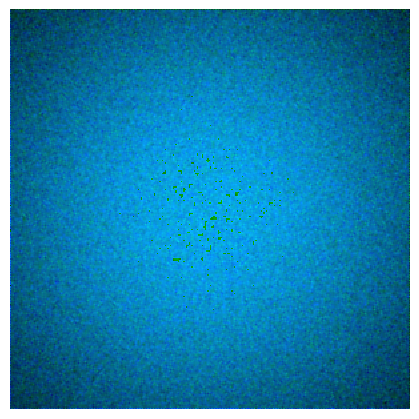

In [24]:
# Gaussian shading
x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
dst = np.sqrt(x*x+y*y)
sigma = 1
muu = 0.001
gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2)))
img_rgb2 = (gauss * img_rgb).astype(float)

# Random noise
img_rgb2[::2, ::2] += np.random.normal(-0.1*img_rgb2[::2, ::2].mean(), 0.1*img_rgb2[::2, ::2].mean(), img_rgb2[::2, ::2].shape)
img_rgb2[1::2, ::2] += np.random.normal(-0.1*img_rgb2[1::2, ::2].mean(), 0.1*img_rgb2[1::2, ::2].mean(), img_rgb2[1::2, ::2].shape)
img_rgb2[1::2, 1::2] += np.random.normal(-0.1*img_rgb2[1::2, 1::2].mean(), 0.1*img_rgb2[1::2, 1::2].mean(), img_rgb2[1::2, 1::2].shape)
img_rgb2[::2, 1::2] += np.random.normal(-0.1*img_rgb2[::2, 1::2].mean(), 0.1*img_rgb2[::2, 1::2].mean(), img_rgb2[::2, 1::2].shape)
img_rgb2 = img_rgb2.astype(np.uint16)
fcp.imshow(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(img_rgb2, 'GRBG').astype(np.uint8))

Again, invoking the `cfa` keyword with legends we get the following:

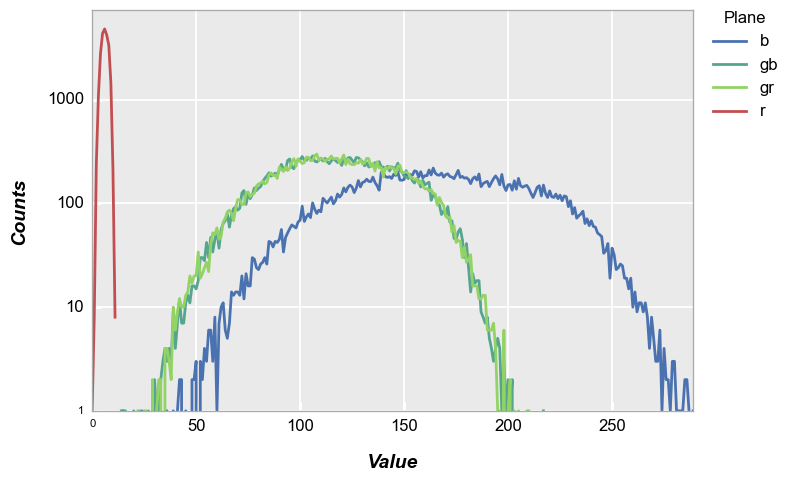

In [25]:
fcp.hist(img_rgb2, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.RGGB)

### RGB images

`fcp.hist` also provides support for RGB data:

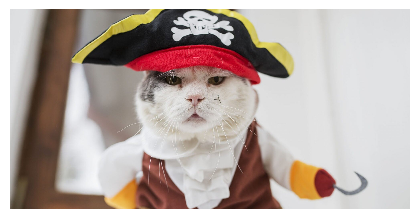

In [26]:
img_rgb = imageio.imread(Path(fcp.__file__).parent / 'test_data/imshow_cat_pirate.png')
fcp.imshow(img_rgb)

If no, color channel information is provided to `fcp.hist`, the luminosity histogram of the grayscale representation of the RGB image is provided:

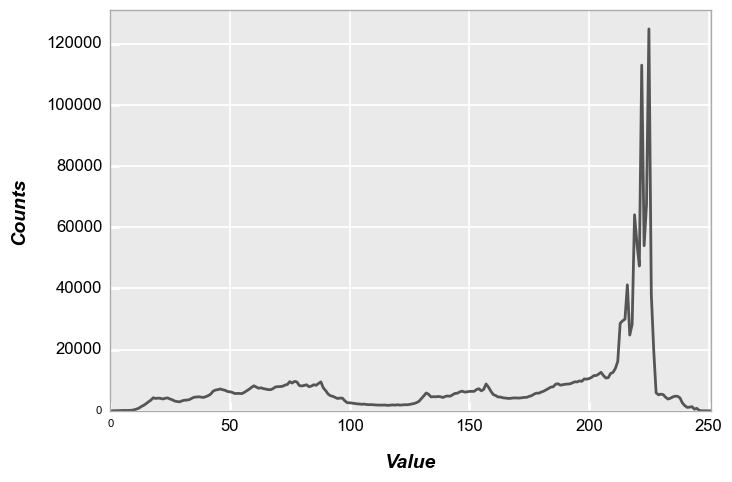

In [27]:
fcp.hist(img_rgb, markers=False, ax_size=[600, 400], line_width=2, line_color='#555555')

If color channel separation is desired, use the grouping label "Channel" (which is automatically calculated by <b>fivecentplots</b>) with a grouping kwarg:

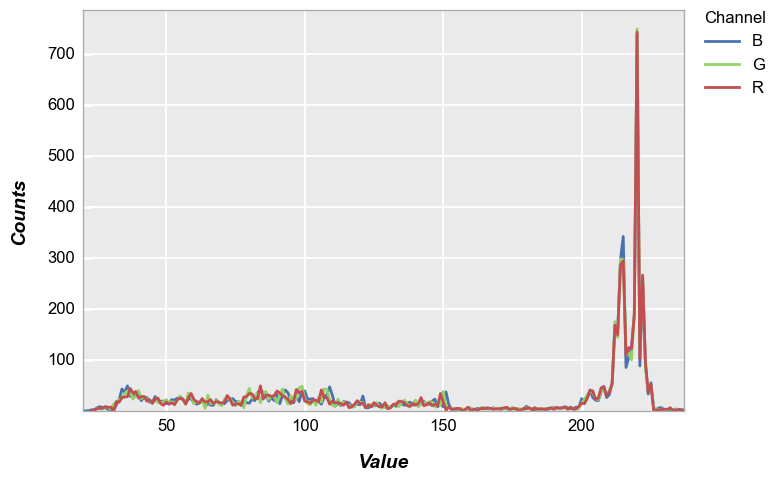

In [28]:
fcp.hist(img_rgb, legend='Channel', markers=False, ax_size=[600, 400], line_width=2, colors=fcp.RGB)

..note:: For better visualization above, we also invoke a special color scheme shortcut `fcp.RGB` to color the histograms according to the specific color channel

## PDF

<b>fivecentplots</b> histograms can be converted to probability density functions inline using the keyword `pdf=True`.  Here we use the shaded color patch with noise from above for our input.

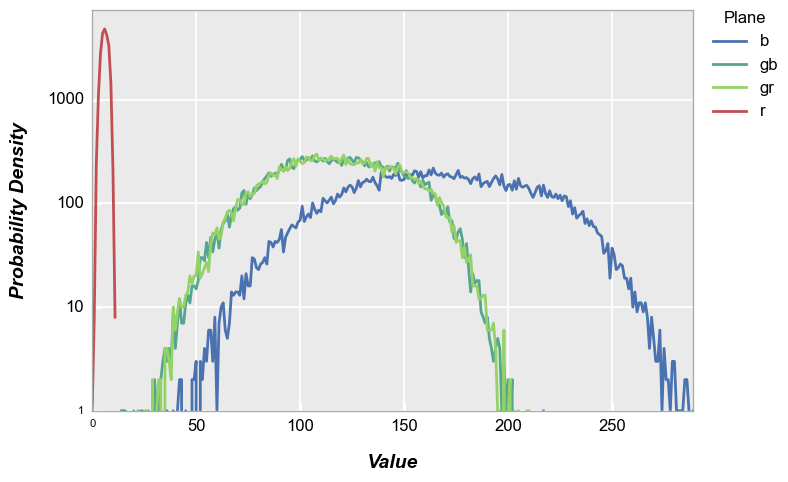

In [29]:
fcp.hist(img_rgb2, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.RGGB, pdf=True)

## CDF

<b>fivecentplots</b> histograms can also be converted to cumulative distribution functions inline using the keyword `pdf=True`.  Again, we use the shaded color patch with noise from above for our input.  With no color plane separation:

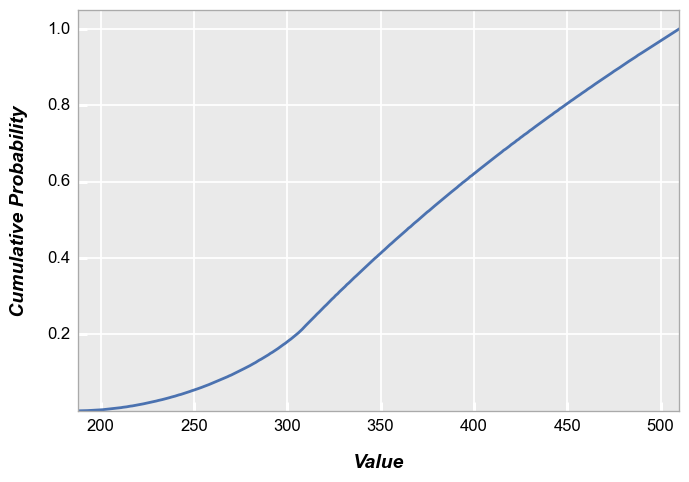

In [30]:
fcp.hist(img2, markers=False, ax_size=[600, 400], line_width=2, colors=fcp.RGGB, cdf=True)

With color plane separation:

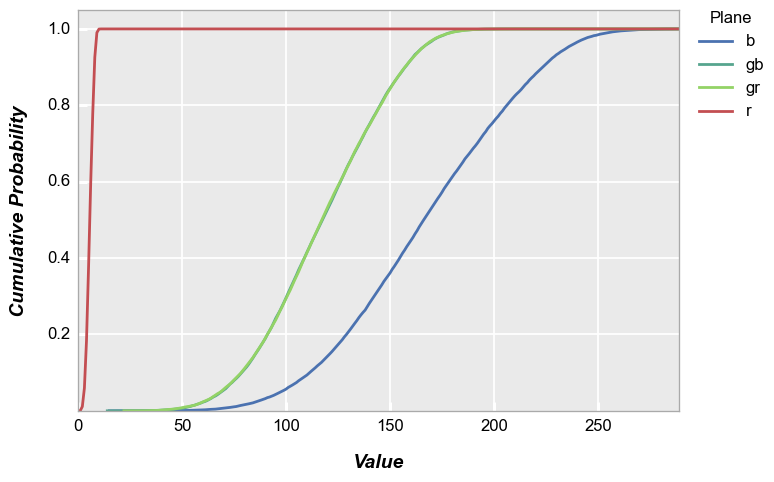

In [31]:
fcp.hist(img_rgb2, markers=False, ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.RGGB, cdf=True)

## Styles

### Bar style

#### Colors

The bar edge and fill colors can be controlled by kwargs:

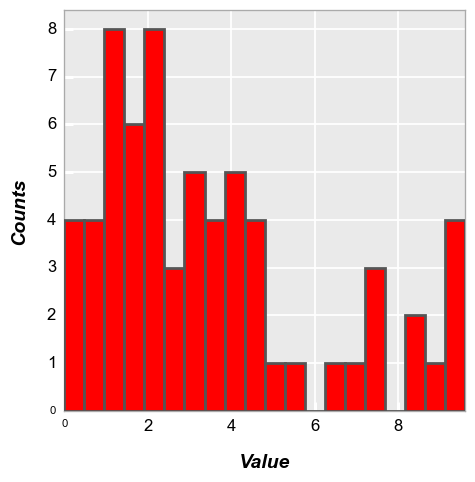

In [32]:
fcp.hist(df, x='Value', hist_edge_color='#555555', hist_edge_width=2, hist_fill_alpha=1, hist_fill_color='#FF0000')

#### Alignment

The alignment of the bars relative to the ticks on the x-axis can be adjusted.  Options include: {'left', 'mid' [default], 'right'}

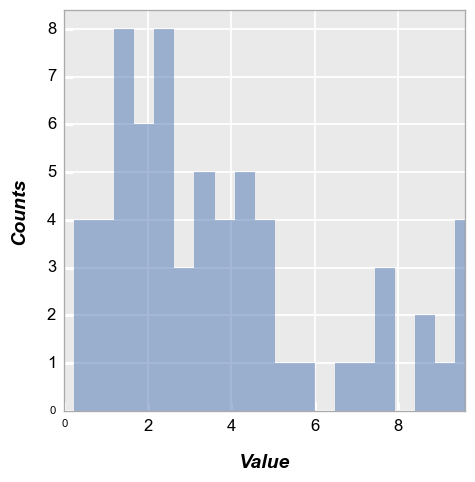

In [33]:
fcp.hist(df, x='Value', hist_align='right')

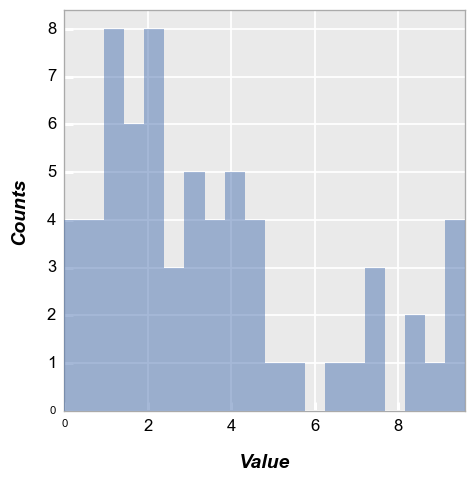

In [34]:
fcp.hist(df, x='Value', hist_align='mid')

#### Width

The relative width (i.e., the percentage of the overall bin width) of the bars can be controlled by the keyword `hist_rwidth`:

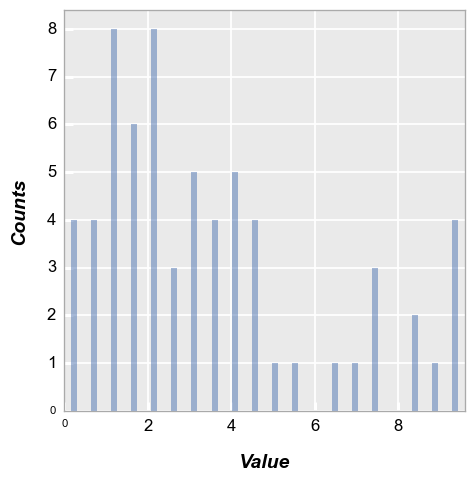

In [35]:
fcp.hist(df, x='Value', hist_rwidth=0.3)

### `fcp.HIST` preset

For more convenient styling of histogram plots from image data, we provide a "preset" dictionary with some common kwargs already defined:

In [36]:
fcp.HIST

{'ax_scale': 'logy', 'markers': False, 'line_width': 2, 'preset': 'HIST'}

Without the preset:

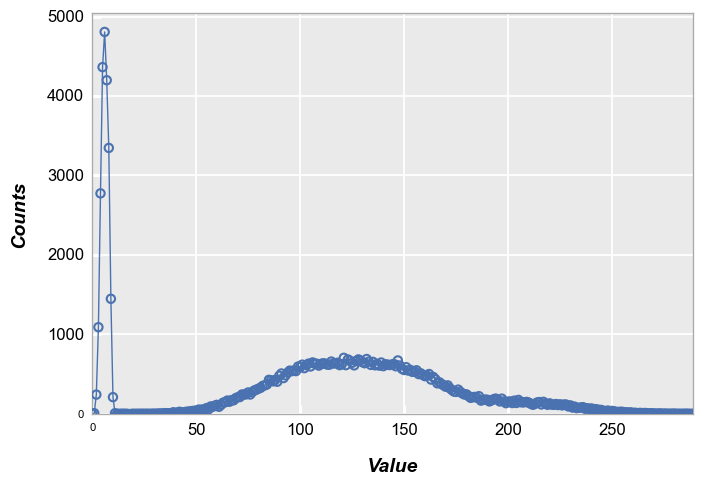

In [37]:
fcp.hist(img_rgb2, ax_size=[600, 400])

With the preset:

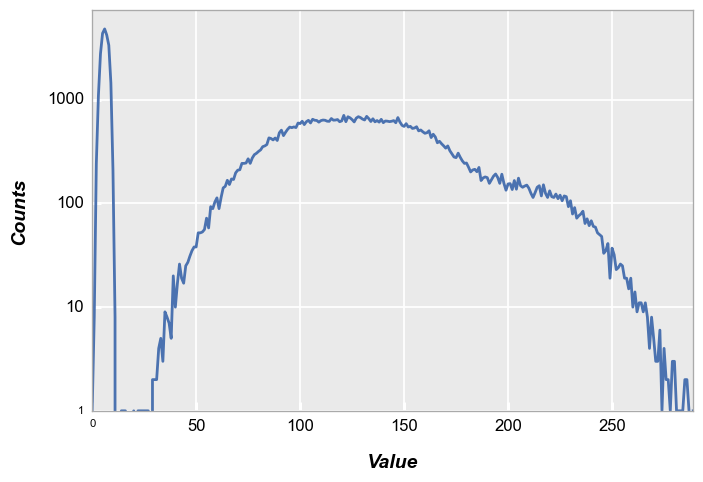

In [38]:
fcp.hist(img_rgb2, ax_size=[600, 400], **fcp.HIST)